In [5]:
def load_data(num):
    """
    """
    df_columns = pd.read_csv(f'{getcwd()}\Datos\{num}', sep='\t')
    colnames = list(df_columns.columns)[0].split(',')

    # Removing hashtags
    colnames = [colname.replace('#', '') for colname in colnames]
    # Removing empty spaces
    colnames = [colname.replace(' ', '') for colname in colnames]

    df_data = pd.read_fwf(f'{getcwd()}\Datos\{num}', header=None, skiprows=[0], names=colnames)

    df_data['V_I'] = df_data['V'] - df_data['I']

    return df_data

In [71]:
def plot_data(df_input):
    """
    """

    import numpy as np

    from matplotlib.path import Path

    ms_polygon_verts=[(0.5, 3.25), (0.35, 2.5), (0.05, 1.5), (-0.15, 0), (-0.25, -2), (-0.1, -2.0), (0.05, -0.75), (0.2, 0), (0.4, 0.5), (0.5, 1.0), (0.6, 1.75), (0.5, 3.25)]


    # x, y = np.meshgrid(np.arange(300), np.arange(300)) # make a canvas with coordinates
    # x, y = x.flatten(), y.flatten()
    points = np.vstack((df_input['V_I'], df_input['I'])).T

    ms_polygon = Path(ms_polygon_verts) # make a polygon
    grid = ms_polygon.contains_points(points)

    print(np.sum(grid))


    # mask = grid.reshape(300,300) # now you have a mask with points inside a polygon

    fig, ax = plt.subplots(figsize=(11.69, 8.27))
    ax.scatter(df_input['V_I'], df_input['I'], s=4)

    # patch = patches.PathPatch(p, facecolor='orange', lw=2)
    patch = patches.PathPatch(ms_polygon, fill=False)

    ax.add_patch(patch)

    ax.set_title('Masa estelar de progenitores y rama principal',)

    ax.set_title('Ejemplo', fontsize=16)
    ax.set_xlabel('(V-I)',  fontsize=14)
    ax.set_ylabel(r'$M_I$', fontsize=14)

    ax.set_xlim([-1, 3])
    # Invert y axis in order to display positive values in lower side
    plt.gca().invert_yaxis()

    # Crea el grid
    plt.grid(b=True, which='major', color='black', linestyle='dashed')
    plt.grid(b=True, which='minor', color='black', linestyle='dashed', alpha=0.2)
    plt.minorticks_on()
    plt.legend()

    plt.savefig(f'{getcwd()}/example.jpg')

No handles with labels found to put in legend.
19952


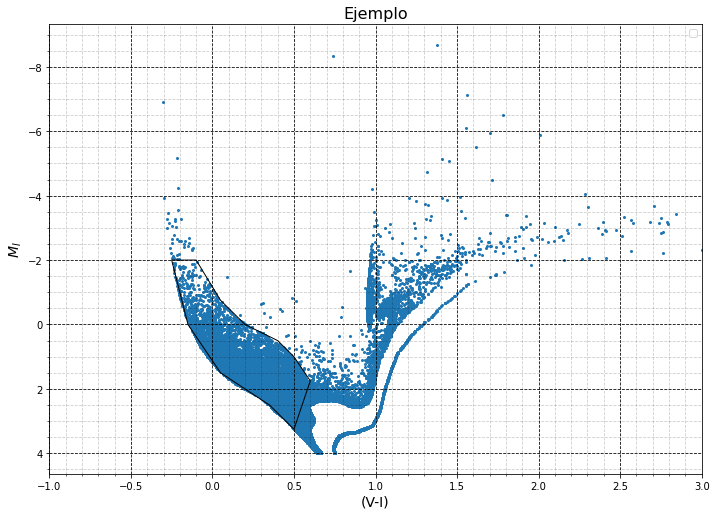

In [72]:
from os import getcwd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

num = 'cmd_Nbajo.txt'

if __name__ == "__main__":
    df = load_data(num)
    plot_data(df)